In [47]:
# Importing needed libraries:
# Make this a function named acquire.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import os
import env

In [48]:
import acquire
import luke_wrangle
import prepare

In [49]:
df = acquire.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,NaN,NaN,1534.0,NaN,NaN,1534.0,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,NaN,33981374.0,-118317057.0,5000.0,NaN,NaN,NaN,NaN,NaN,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,118208.0,96028.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1940.0,NaN,NaN,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1458.0,1458.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,NaN,NaN,1421.0,1421.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,NaN,NaN,2541.0,2541.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,261.0,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33985377.0,-118361620.0,7300.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,NaN,96037.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1949.0,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [50]:
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

In [51]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,NaN,NaN,1534.0,NaN,NaN,1534.0,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,NaN,33981374.0,-118317057.0,5000.0,NaN,NaN,NaN,NaN,NaN,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,118208.0,96028.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1940.0,NaN,NaN,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1458.0,1458.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,NaN,NaN,1421.0,1421.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,NaN,NaN,2541.0,2541.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,261.0,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33985377.0,-118361620.0,7300.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,NaN,96037.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1949.0,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

In [53]:
df.shape

(21352, 62)

## Data Preparation

In [54]:
# Finding out how many of the columns have at least half of their rows as nulls:

df.isna().sum() > (df.shape[0]/2 + 1000)

id                          False
parcelid                    False
airconditioningtypeid        True
architecturalstyletypeid     True
basementsqft                 True
                            ...  
taxdelinquencyyear           True
censustractandblock         False
propertylandusetypeid       False
logerror                    False
transactiondate             False
Length: 62, dtype: bool

In [ ]:
df = df.drop(columns = {'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
                        'taxdelinquencyyear', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet',
                        'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
                        'finishedsquarefeet6', 'fireplacecnt', 'hashottuborspa', 'poolsizesum',
                        'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'threequarterbathnbr',
                        'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories',
                        'fireplaceflag', 'taxdelinquencyflag', 'buildingqualitytypeid', 'garagecarcnt', 'garagetotalsqft', 'poolcnt', 'regionidneighborhood', 'propertyzoningdesc' })

In [10]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,NaN,NaN,1534.0,NaN,NaN,1534.0,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,NaN,33981374.0,-118317057.0,5000.0,NaN,NaN,NaN,NaN,NaN,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,118208.0,96028.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1940.0,NaN,NaN,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1458.0,1458.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,NaN,NaN,1421.0,1421.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,NaN,NaN,2541.0,2541.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,261.0,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33985377.0,-118361620.0,7300.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,NaN,96037.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1949.0,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [11]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

<AxesSubplot:>

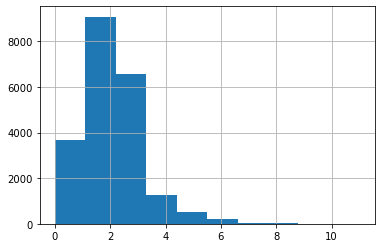

In [12]:
df.bathroomcnt.hist()

<AxesSubplot:>

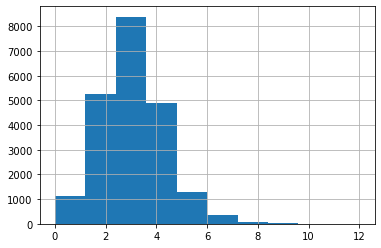

In [13]:
df.bedroomcnt.hist()

In [14]:
# Creating a diaginal heatmap that allows a clear view of the correlated features (independent variables)

<AxesSubplot:>

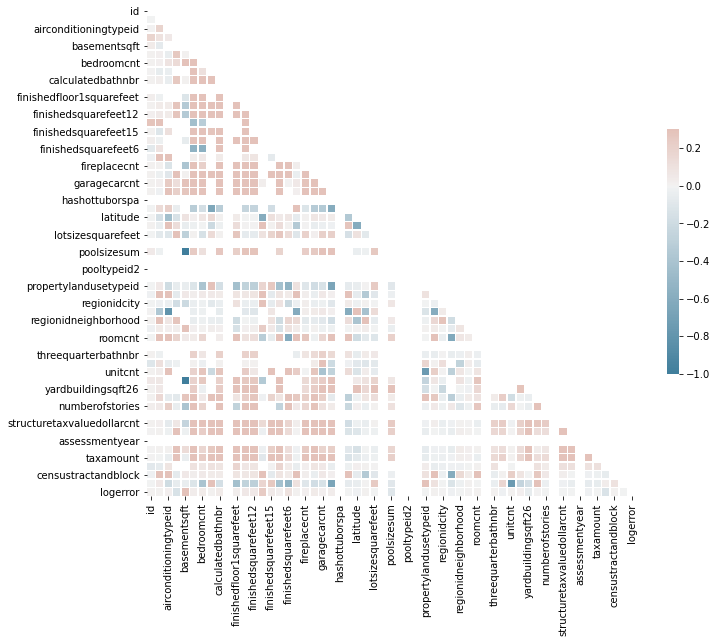

In [15]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

In [ ]:
print(df.bathroomcnt.isna().sum())
print(df.bedroomcnt.isna().sum())
print(df.calculatedfinishedsquarefeet.isna().sum())

In [ ]:
# For the MVP, these are the 3 features (columns) to focus on. 

In [ ]:
df.calculatedfinishedsquarefeet.hist()

In [ ]:
# Let's go with the mean:

df.calculatedfinishedsquarefeet.mean()

In [ ]:
df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna((df['calculatedfinishedsquarefeet'].mean()))

In [ ]:
df.head()

## Using Corrplot

Attempting to use the corrplot function from biokit.viz

In [ ]:
df_corr = df[['parcelid', 'bathroomcnt', 'bedroomcnt', '']]
df_corr.head()

In [ ]:
# Isolating the object columns so I can get a realistic heatmap:

# Creating the mask and if a column is an int/float/object
mask = np.array(df.dtypes == "object")

# Creating the boolean mask:
object_cols = df.iloc[:, mask].columns.tolist()
object_cols

In [ ]:
numeric_type_cols = df.iloc[:, ~mask].columns.tolist()
numeric_type_cols

In [ ]:
df_corr = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
# df_corr.drop(columns = {'id', 'logerror'})
df_corr.head()

In [ ]:
from biokit.viz import corrplot
c = corrplot.Corrplot(df_corr)
# c.plot(colorbar=False, method='circle', shrink=.9, lower='circle')
c.plot()

In [17]:
import prepare

In [57]:
df = prepare.prep_zillow_data()
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusetypeid,logerror
0,2463969,11393337,3.0,3.0,3.0,1534.0,1776.715597,6037.0,3.0,3.955741,33981374.0,-118317057.0,5000.0,247.0,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.000000,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,6.037235e+13,247,0.086137
1,2061546,11289917,2.0,3.0,2.0,1458.0,1458.000000,6037.0,2.0,2.000000,34686163.0,-118113100.0,8284.0,261.0,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.000000,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,6.037901e+13,261,-0.362001
2,1834372,11705026,1.0,2.0,1.0,1421.0,1421.000000,6037.0,1.0,2.000000,33999877.0,-118291863.0,6707.0,261.0,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.000000,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,6.037232e+13,261,-0.146056
3,1923117,14269464,3.0,4.0,3.0,2541.0,2541.000000,6059.0,3.0,3.955741,33694636.0,-117912245.0,4975.0,261.0,6.059064e+07,38032.0,1286.0,96958.0,0.0,1.108271,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,6.059064e+13,261,0.021085
4,2121349,11389003,2.0,3.0,2.0,1650.0,1650.000000,6037.0,2.0,2.000000,33985377.0,-118361620.0,7300.0,261.0,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.000000,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,6.037703e+13,261,-0.325393


In [58]:
df.shape

(21352, 29)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   bathroomcnt                   21352 non-null  float64
 3   bedroomcnt                    21352 non-null  float64
 4   calculatedbathnbr             21352 non-null  float64
 5   calculatedfinishedsquarefeet  21352 non-null  float64
 6   finishedsquarefeet12          21352 non-null  float64
 7   fips                          21352 non-null  float64
 8   fullbathcnt                   21352 non-null  float64
 9   heatingorsystemtypeid         21352 non-null  float64
 10  latitude                      21352 non-null  float64
 11  longitude                     21352 non-null  float64
 12  lotsizesquarefeet             21352 non-null  float64
 13  p

### MVP prep is almost done.

At this point we realized that we had to take out the object columns in the dataframe in order to scale our numeric data. We took out the object columns in order for our min_max_scale function to run appropriately.

In [35]:
# Now on to splitting the data:

df.head()
df.shape

(21352, 29)

### For the MVP, we only need 3 columns, plus a target variable, so I'm making an MVP dataframe that isolates those columns:

In [83]:
mvp_df = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
mvp_df.shape

(21352, 4)

In [84]:
# Importing the wrangle function:
import luke_wrangle

In [85]:
X_train, y_train, X_validate, y_validate, X_test, y_test = luke_wrangle.train_validate_test(mvp_df, 'taxvaluedollarcnt')

In [86]:
X_train.shape

(11956, 3)

In [87]:
X_train.shape, y_train.shape, X_validate.shape, X_test.shape

((11956, 3), (11956,), (5125, 3), (4271, 3))

In [88]:
obj_cols = luke_wrangle.get_object_cols(df)
obj_cols

[]

In [89]:
numeric_cols = luke_wrangle.get_numeric_X_cols(X_train, obj_cols)
numeric_cols

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']

In [91]:
numeric_cols

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']

In [94]:
X_train.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
       'propertylandusetypeid', 'logerror'],
      dtype='object')

In [100]:
X_train_scaled, X_validate_scaled, X_test_scaled = luke_wrangle.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [99]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((11956, 3), (5125, 3), (4271, 3))

In [101]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
3927,0.272727,0.166667,0.182322
19745,0.090909,0.166667,0.043299
1732,0.227273,0.250000,0.103328
17739,0.272727,0.250000,0.125783
15673,0.090909,0.250000,0.063697


## Now we have an MVP dataset that has been split into X_train, etc.